<a href="https://colab.research.google.com/github/jdug1981/proyecto_final/blob/main/PROYECTO_ORIGINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align=center><font size = 5>PROYECTO DE MACHINE LEARNING</font></h1>

---

## Problema - BANKING TELEMARKETING
<b>Valores de la vivienda en los suburbios de Boston</b>

<h5>La variable <b>medv</b> es la variable objetivo.</h5>

<b>Descripción de datos</b>

El data frame de TeleMarketing contiene 41188 filas y 21 columnas.

<b>Este data frame contiene las siguientes columnas:</b>

---

* <b>age : </b> Edad del cliente (variable numérica).

* <b>job : </b> Tipo de empleo del cliente (variable categórica), que puede incluir valores como "admin.", "blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed", "services", "student" y "technician", entre otros.

* <b>marital : </b> Estado civil del cliente (variable categórica), con categorías como "divorced", "married" y "single".

* <b>education : </b> Nivel educativo del cliente (variable categórica), que puede ser "basic.4y", "basic.6y", "basic.9y", "high.school", "illiterate", "professional.course", "university.degree" o "unknown".

* <b>default : </b>Indicador de crédito por defecto (variable categórica), con categorías "no" y "yes".

* <b>housing : </b>Indicador de préstamo hipotecario (variable categórica), con categorías "no" y "yes".

* <b>loan : </b> Indicador de préstamo personal (variable categórica), con categorías "no" y "yes".

* <b>contact : </b>Tipo de comunicación establecido con el cliente (variable categórica), que puede ser "cellular" o "telephone".

* <b>month : </b>Mes del año en el que se realizó el último contacto (variable categórica), con valores como "jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov" y "dec".

* <b>day_of_week : </b>Día de la semana en el que se realizó el último contacto (variable categórica), con categorías "mon", "tue", "wed", "thu" y "fri".

* <b>duration : </b>Duración del último contacto realizado en segundos (variable numérica).

* <b>campaign : </b> Número de contactos realizados durante esta campaña para este cliente (variable numérica).

* <b>pdays : </b>Número de días transcurridos desde el último contacto de una campaña anterior (variable numérica). Un valor de 999 indica que el cliente no fue contactado previamente.

* <b>previous : </b>Número de contactos realizados antes de esta campaña para este cliente (variable numérica).

* <b>poutcome : </b>Resultado de la campaña de marketing anterior (variable categórica), con categorías "failure", "nonexistent" y "success".

* <b>emp.var.rate : </b>Tasa de variación del empleo (variable numérica).

* <b>cons.price.idx : </b>Índice de precios al consumidor (variable numérica).

* <b>cons.conf.idx : </b>Índice de confianza del consumidor (variable numérica).

* <b>euribor3m : </b>Tasa de interés del Euribor a 3 meses (variable numérica).

* <b>nr.employed : </b>Número de empleados (variable numérica).

* <b>y : </b>Variable objetivo (variable categórica), que indica si el cliente se suscribió ("yes") o no ("no") a un producto o servicio.

---

## Contexto

Una institución financiera no bancaria (NBFI) o una compañía financiera no bancaria (NBFC) es una institución financiera que no tiene una licencia bancaria completa o no está supervisada por una agencia reguladora bancaria nacional o internacional. NBFC facilita los servicios financieros relacionados con los bancos, como inversión, agrupación de riesgos, ahorros contractuales y corretaje de mercado.

Una NBFI está luchando por marcar ganancias debido a un aumento en los incumplimientos en la categoría de préstamos para vehículos. La empresa tiene como objetivo determinar la capacidad de pago del préstamo del cliente y comprender la importancia relativa de cada parámetro que contribuye a la capacidad del prestatario para pagar el préstamo.

<b>Meta:</b>

El objetivo del problema es predecir si un cliente no cumplirá con el pago del préstamo del vehículo o no.

## 0.- Importar Librerías
Primero, importemos algunos módulos comunes.

In [43]:
# Definición de Librerias
!pip install pandas_profiling
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import ydata_profiling
import matplotlib.pyplot as plt
import os

## 1.- Leyendo y Explorando data

In [44]:
mainpath = "bank_full.csv"
data = pd.read_csv(mainpath,sep=";")

In [45]:
# Contar los datos:
print(data.shape)
# Validar la data de forma general
data.head()

(45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Identificar los principales atributos:

In [46]:
# Identificamos los tipos de variables:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [47]:
# Iniciamos con modificar la variable objetivo para los futuros trabajos a realizar:
# Debemos de cambiar la variable objetivo "no" por "0":
print(data['y'].unique())
data['y'] = data['y'].str.replace('no','0', regex=False)
print(data['y'].unique())

['no' 'yes']
['0' 'yes']


In [48]:
# Debemos de cambiar la variable objetivo "si" por "1".
print(data['y'].unique())
data['y'] = data['y'].str.replace('yes','1', regex=False)
print(data['y'].unique())

['0' 'yes']
['0' '1']


In [49]:
# Ahora procedemos con modificar el tipo de campo (de char a numeric)
data['y']=data['y'].astype(str).astype(int)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [51]:
# Identificar las variables categóricas utilizando el atributo dtypes
variables_categoricas = data.select_dtypes(include=['object']).columns.tolist()
variables_categoricas

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [52]:
# Identificar las variables numéricas utilizando el atributo dtypes
variables_numericas = data.select_dtypes(include=['number']).columns.tolist()
#variables_numericas.remove(target)
variables_numericas

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']

In [53]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


<Axes: xlabel='y', ylabel='count'>

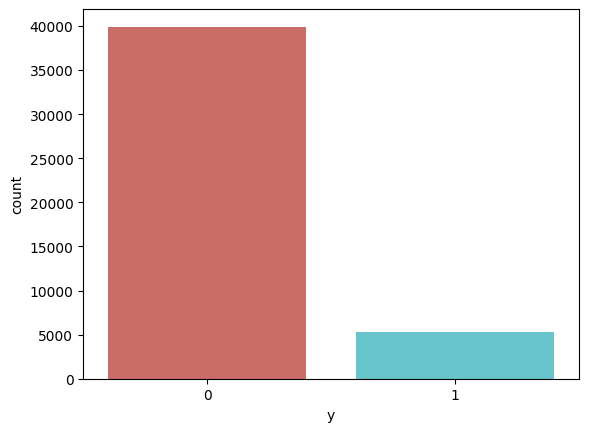

In [54]:
# Analizando el target
sns.countplot(x='y', data = data, palette = 'hls')

In [55]:
data.y.mean()

0.11698480458295547

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [57]:
#Exploración de variables categóricas
# Con este análisis detectamos las relaciones que puede tener c/u de las variables vs la variable objetivo.
data.groupby('marital').agg({'y': 'mean'})
# En resumen, visualizamos que las personas solteras poseen un 14%
# que dieron la conformidad para brindarles el producto via telefónica.

,y
marital,
divorced,0.119455
married,0.101235
single,0.149492


In [58]:
# Ahora veamos con la variable "education" para ver las probabilidades que poseen:
data.groupby('education').agg({'y': 'mean'})
# Al ejecutar este análisis, se visualiza que los analfabetos son las personas que
# mas han estado interesadas en el producto.

,y
education,
primary,0.086265
secondary,0.105594
tertiary,0.150064
unknown,0.135703


In [59]:
 # Vamos a describir la información.
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0
y,45211.0,0.116985,0.321406,0.0,0.0,0.0,0.0,1.0


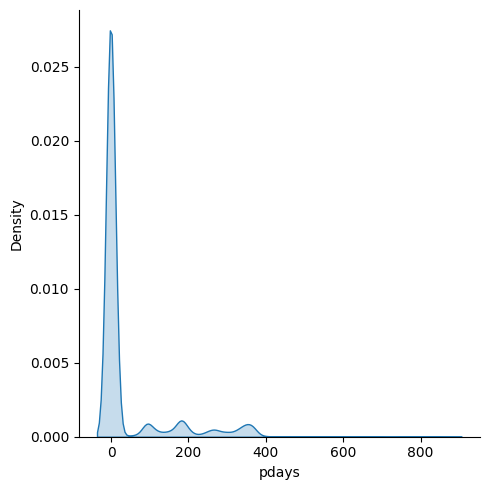

In [60]:
# Gráfico de Distribución de la variable objetivo
sns.displot(data['pdays'],kind="kde",fill=True)

<Figure size 400x600 with 0 Axes>

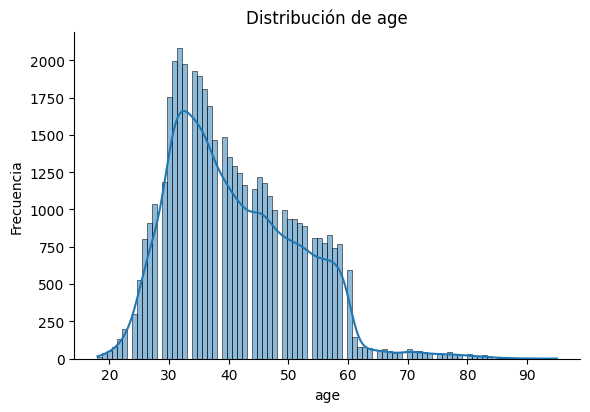

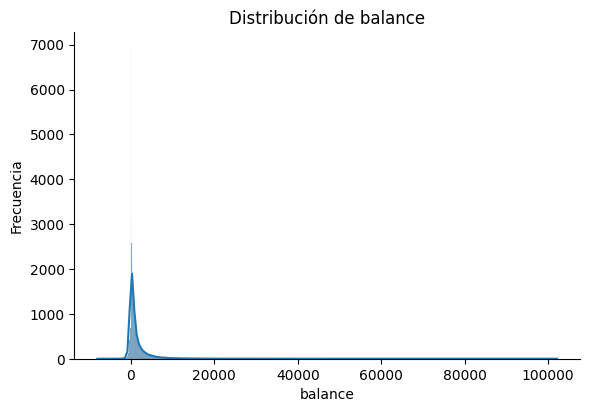

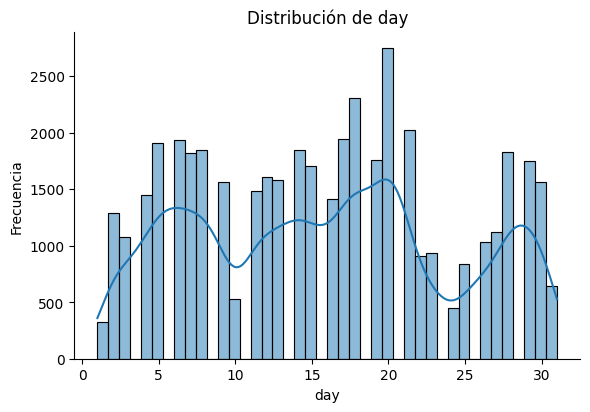

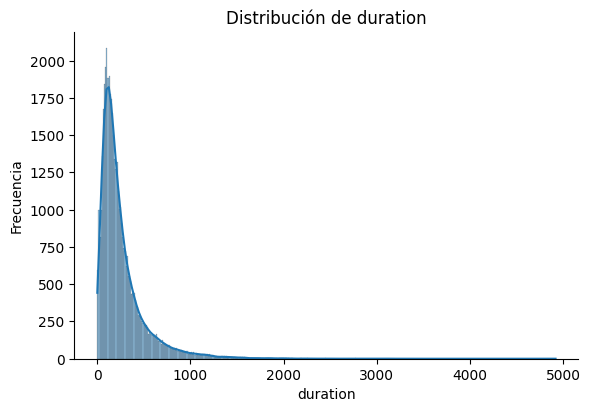

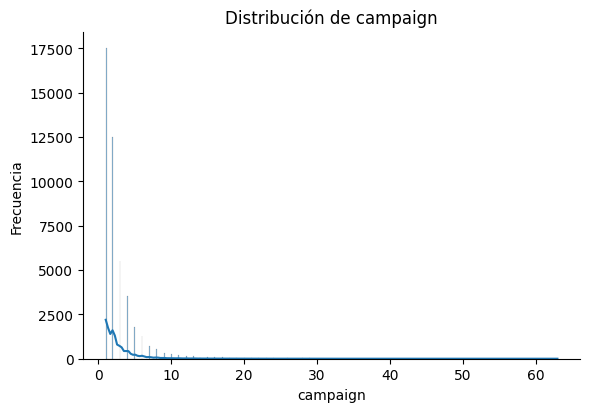

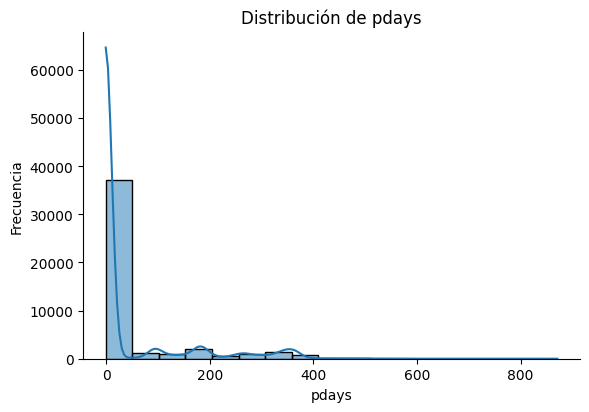

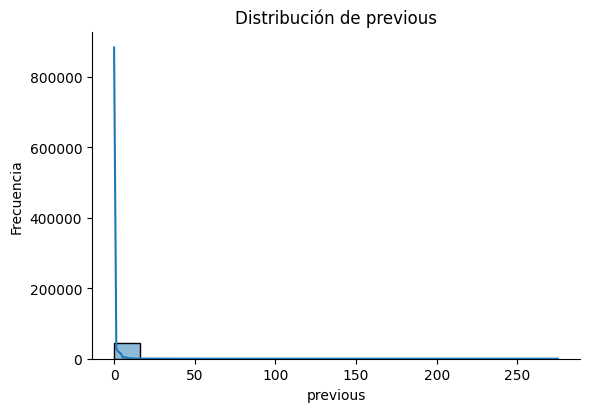

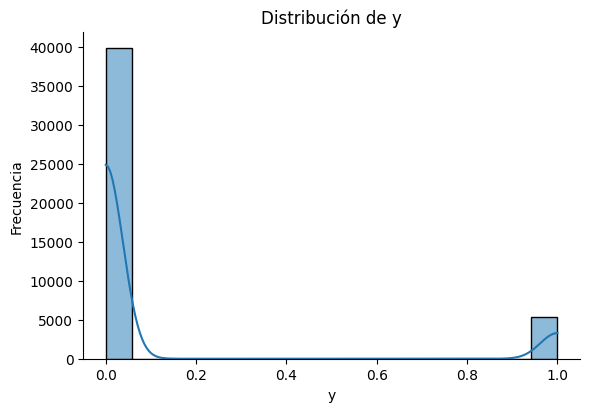

In [61]:
plt.figure(figsize=(4, 6))  # Tamaño del gráfico (ancho x alto en pulgadas)

for col in variables_numericas:
  # Gráfico de distribución
  sns.displot(data[col], height=4, aspect=1.5, kde=True)
  plt.title("Distribución de " + col, fontsize=12)  # Título del gráfico
  plt.xlabel(col, fontsize=10)  # Nombre del eje x
  plt.ylabel("Frecuencia", fontsize=10)  # Nombre del eje y
  plt.savefig(col + ".png")  # Guarda el gráfico como un archivo PNG
  #plt.close()
  plt.show()

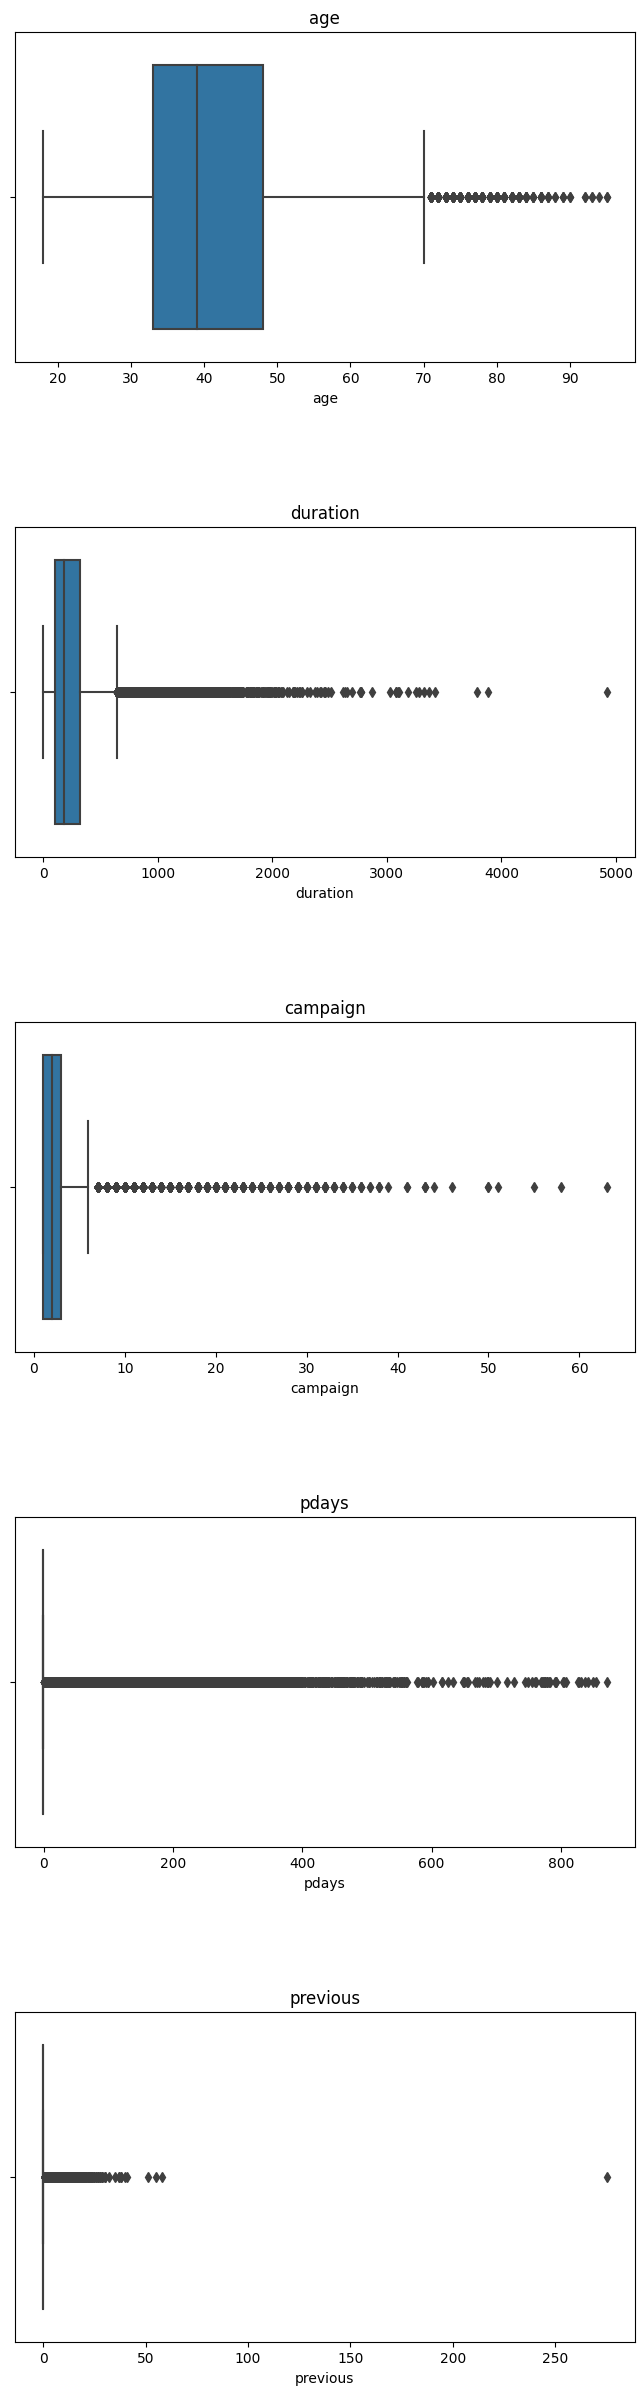

In [62]:
# Generar gráficas individuales boxplot pues las variables numéricas.
# están en rangos diferentes
cols_num = ['age', 'duration', 'campaign', 'pdays', 'previous']

fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)

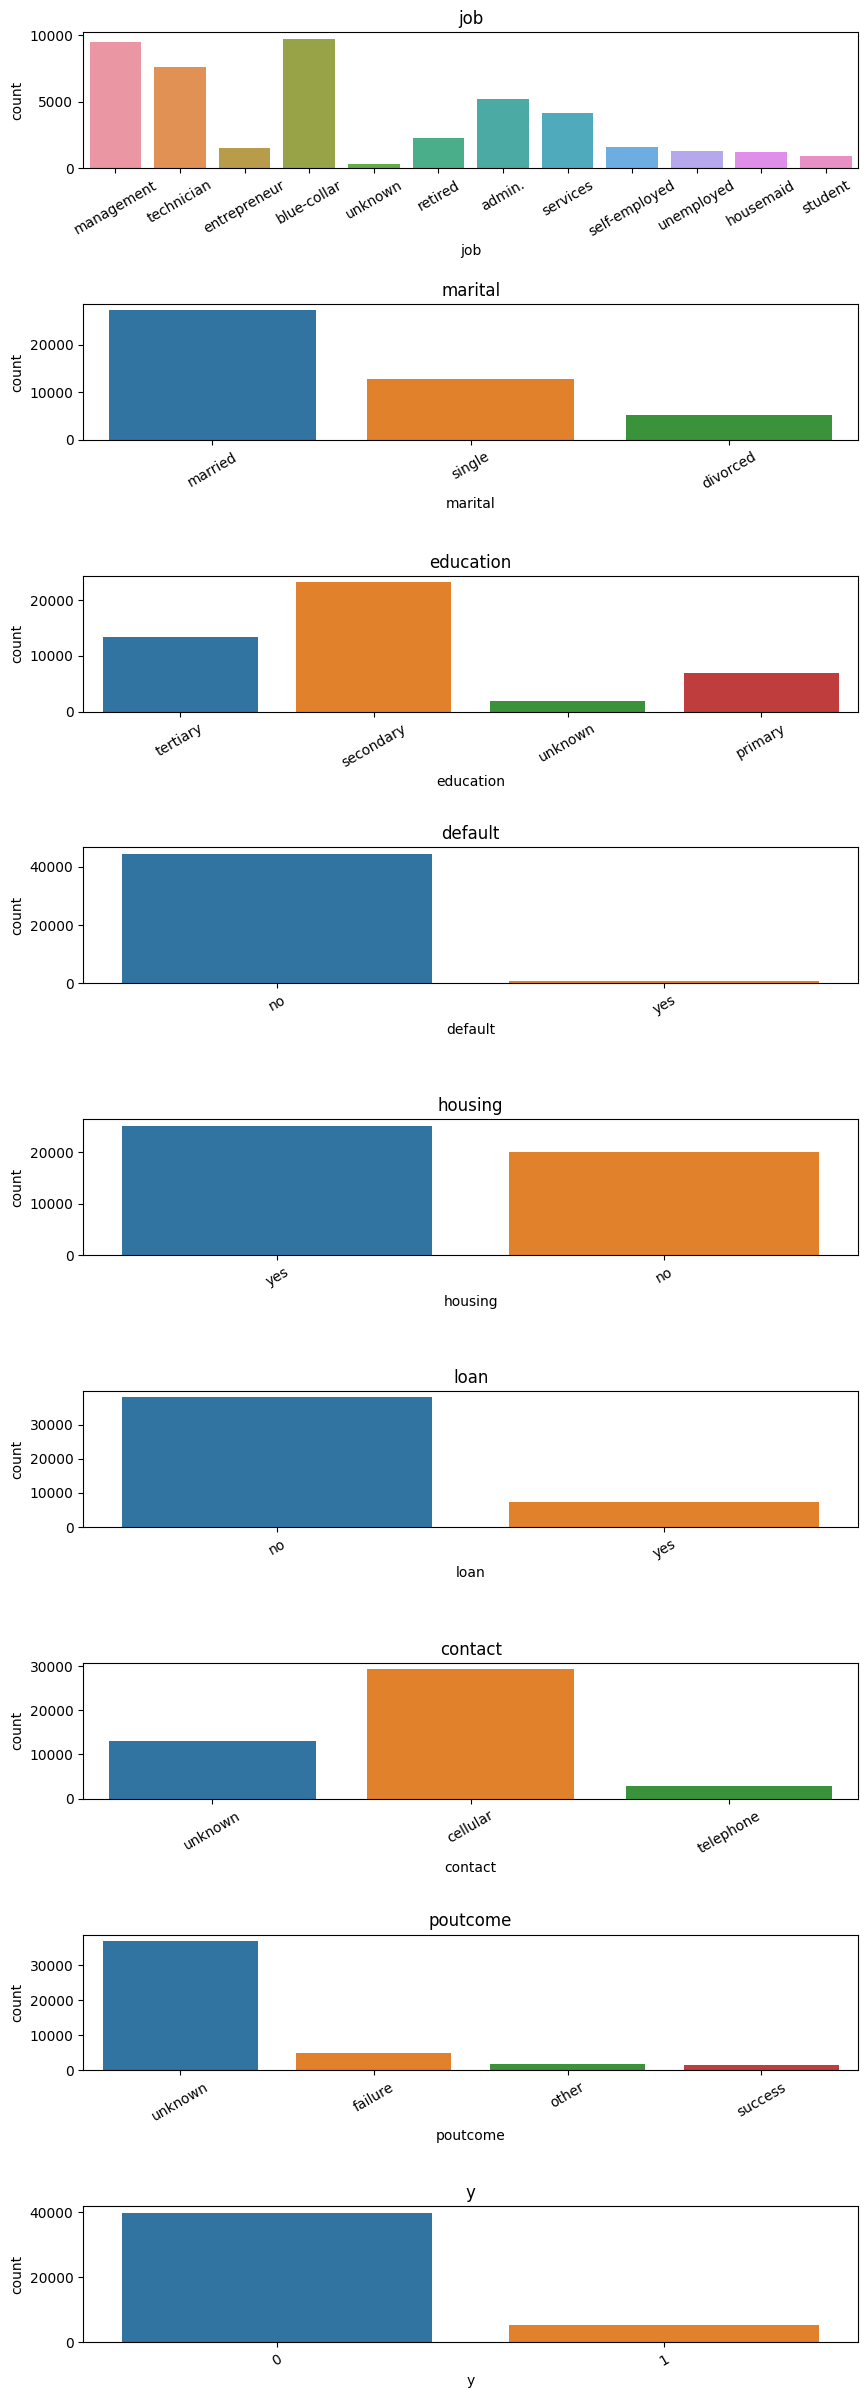

In [63]:
# Graficar los subniveles de cada variable categórica
cols_cat = ['job','marital','education','default','housing','loan','contact','poutcome','y']
fig, ax = plt.subplots(nrows=9, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
  sns.countplot(x=col, data=data, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

## 2.- Selección de Muestras

In [64]:
# Muestreo
from sklearn.model_selection import train_test_split

train, test = train_test_split(data,
                               stratify = data['y'],
                               train_size=0.7,
                               random_state=123)

In [65]:
print(f"Tamaño del total de datos: {len(data)}")
print(f"Tamaño de train: {len(train)}")
print(f"Tamaño de test: {len(test)}")

Tamaño del total de datos: 45211
Tamaño de train: 31647
Tamaño de test: 13564


## 3.- Pre-Selección de variables:

In [66]:
# Dando formato a nuestra tabla resumen
pdResume = train.describe().transpose()
# Ahora el nuevo index será el campo "feature"
pdResume.reset_index(inplace = True)
pdResume.rename(columns = {'index' : 'feature',
                           '25%' : 'Q1',
                           '50%' : 'median',
                           '75%' : 'Q3'}, inplace = True)
pdResume

,feature,count,mean,std,min,Q1,median,Q3,max
0,age,31647.0,40.972825,10.657961,18.0,33.0,39.0,48.0,95.0
1,balance,31647.0,1373.386040,3047.179071,-6847.0,73.0,448.0,1449.5,102127.0
2,day,31647.0,15.834234,8.335395,1.0,8.0,16.0,21.0,31.0
3,duration,31647.0,258.173065,258.623603,0.0,103.0,179.0,317.0,3881.0
4,campaign,31647.0,2.779000,3.124117,1.0,1.0,2.0,3.0,58.0
5,pdays,31647.0,40.340917,100.261049,-1.0,-1.0,-1.0,-1.0,871.0
6,previous,31647.0,0.584605,2.472085,0.0,0.0,0.0,0.0,275.0
7,y,31647.0,0.116978,0.321399,0.0,0.0,0.0,0.0,1.0


In [67]:
# Procedemos con crear la columna missig para ver el porcentaje de valores perdidos:
pdResume[['missing_rate']] = 1 - pdResume[['count']]/train.shape[0]
pdResume.sort_values(by = 'missing_rate', ascending = False, inplace = True)
pdResume

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate
0,age,31647.0,40.972825,10.657961,18.0,33.0,39.0,48.0,95.0,0.0
1,balance,31647.0,1373.386040,3047.179071,-6847.0,73.0,448.0,1449.5,102127.0,0.0
2,day,31647.0,15.834234,8.335395,1.0,8.0,16.0,21.0,31.0,0.0
3,duration,31647.0,258.173065,258.623603,0.0,103.0,179.0,317.0,3881.0,0.0
4,campaign,31647.0,2.779000,3.124117,1.0,1.0,2.0,3.0,58.0,0.0
5,pdays,31647.0,40.340917,100.261049,-1.0,-1.0,-1.0,-1.0,871.0,0.0
6,previous,31647.0,0.584605,2.472085,0.0,0.0,0.0,0.0,275.0,0.0
7,y,31647.0,0.116978,0.321399,0.0,0.0,0.0,0.0,1.0,0.0


In [68]:
# Se ejecuta este comando, pero en realidad como la data ya está trabajada o sin na, entonces no se elimina ningún registro
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [69]:
# Conteo de los niveles en las diferentes columnas categóricas:
# Como se verá en su ejecución, todas las variables categóricas poseen mas de 1 subnivel, por tal motivo no podremos a primera vista, eliminar alguna columna.
cols_cat = ['job','marital','education','default','housing','loan','contact','day_of_week','poutcome','y']
for col in cols_cat:
  print('Columna ', col, ': ' , data[col].nunique() ,  ' Subniveles')

Columna  job :  12  Subniveles
Columna  marital :  3  Subniveles
Columna  education :  4  Subniveles
Columna  default :  2  Subniveles
Columna  housing :  2  Subniveles
Columna  loan :  2  Subniveles
Columna  contact :  3  Subniveles


KeyError: ignored

In [ ]:

data.describe()

In [ ]:
# Hemos validado que hay filas repetidas...Se eliminarán 12 filas.
print(f'Tamaño del set antes de eliminar las filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {data.shape}')

## 3.- Tratamiento de Variables

In [ ]:
train['poutcome'].value_counts()

In [ ]:
train['poutcome'].drop_duplicates()

In [ ]:
!pip install category_encoders

In [ ]:
# Tratamiento con Target Encoder
# Se trabajará una consolidación con la variable "job"
from category_encoders import TargetEncoder

encoder = TargetEncoder(handle_unknown = 'infrequent_if_exist')
encoder.fit(train[variables_categoricas].astype('category'), train['y'])

In [ ]:
TargetEncoder(cols=['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome'],
              handle_unknown='infrequent_if_exist')


In [ ]:
train[[x + '_coded' for x in variables_categoricas]] = encoder.transform(train[variables_categoricas].astype('category'))
test[[x + '_coded' for x in variables_categoricas]] = encoder.transform(test[variables_categoricas].astype('category'))

In [ ]:
train[['job', 'job_coded']].head(10)

### Análisis univariado I

In [ ]:
categorical_features_coded = [x + '_coded' for x in variables_categoricas]

In [ ]:
categorical_features_coded

In [ ]:
univariate = train[variables_numericas + categorical_features_coded].describe(percentiles = [0.05, 0.95]).transpose()
univariate.reset_index(drop = False, inplace = True)

univariate['missing_rate'] = 1 - univariate['count']/len(train)

univariate.rename(columns = {'index' : 'feature',
                             '5%': 'p5',
                             '50%' : 'median',
                             '95%': 'p95'}, inplace = True)
univariate.head()

In [ ]:
# Tratamiento de outliers por percentiles

for col in univariate.feature.tolist():
  desc = univariate.loc[univariate.feature == col]

  lower_limit = desc.p5.values[0]
  upper_limit = desc.p95.values[0]

  train[col + '_t'] = train[col].apply(lambda x: lower_limit if x <= lower_limit else
                                                    upper_limit if x >= upper_limit else
                                                    x)

  test[col + '_t'] = test[col].apply(lambda x: lower_limit if x <= lower_limit else
                                               upper_limit if x >= upper_limit else
                                               x)

In [ ]:
univariate.feature.tolist()

In [ ]:
sns.boxplot(x = train.age)

In [ ]:
# Discretizar variables
from sklearn.preprocessing import KBinsDiscretizer

var = 'Age_Days_t'
temp = train.copy()
temp = temp.fillna(temp.mean())


discretizer = KBinsDiscretizer(n_bins = 10,
                               encode = 'ordinal',
                               strategy = "uniform").fit(np.array(temp[var]).reshape(-1, 1))